In [1]:
from matplotlib import pyplot as plt
import pandas as pd
from cobra.io import read_sbml_model
from cobra import Reaction, Metabolite
from cameo.strain_design.deterministic.flux_variability_based import FSEOF

In [2]:
model = read_sbml_model('iCW773_psilocybin.xml') #Loading the model

No objective coefficients in model. Unclear what should be optimized


In [3]:
#Defining Optimization Target
model.objective = model.reactions.CG_biomass_cgl_ATCC13032
model.optimize().objective_value

0.428929662134894

In [4]:
#Flux Scanning Enforced Objective Flux Algorithm
fseof = FSEOF(model)
f_result = fseof.run(target=model.reactions.EX_psi_e) #Defining Flux of Interest (x axis)
frdf = f_result.data_frame

Text(0, 0.5, 'Flux $\\left[\\dfrac{mmol}{gDW\\cdot h}\\right]$')

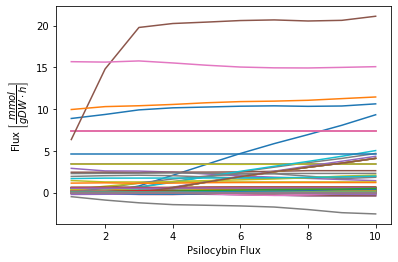

In [5]:
#Plotting FSEOF Results
frdf.T.plot(legend= None) #Legend too big to show
plt.xlabel("Psilocybin Flux")
plt.ylabel(r"Flux $\left[\dfrac{mmol}{gDW\cdot h}\right]$")

In [6]:
frdf['RCiF'] = (frdf[10]-frdf[1])/frdf[10] +1 #Adding "Relative Change in Flux" Column
frdf['Dif'] = abs(frdf[10])-abs(frdf[1]) #Adding a "Subtraction" Column
frdf['Slope'] = frdf[10]-frdf[1]/9 #Slope of the line

In [7]:
frdf.sort_values(by=[10], ascending= False)

,1,2,3,4,5,6,7,8,9,10,RCiF,Dif,Slope
CYTBDpp,6.344483,14.796893,19.765623,20.237697,20.407349,20.593325,20.668518,20.540138,20.617364,21.108557,1.699435,14.764074,20.403614
NADH16pp,15.668103,15.618126,15.757287,15.515916,15.243191,15.025550,14.929919,14.915222,14.986117,15.069604,0.960284,-0.598499,13.328704
CO2tpp,9.939745,10.287943,10.390913,10.546077,10.749321,10.887729,10.944334,11.045224,11.244422,11.440472,1.131177,1.500727,10.336056
O2tpp,8.866996,9.348759,9.896750,10.142506,10.237050,10.336652,10.380561,10.320427,10.361341,10.617109,1.164839,1.750113,9.631887
PPA,0.000000,0.000000,0.784898,2.066134,3.378643,4.675027,5.857324,6.934692,8.053104,9.313492,2.000000,9.313492,9.313492
...,...,...,...,...,...,...,...,...,...,...,...,...,...
METt2rpp,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.025271,-0.108535,-0.206861,-0.229634,2.000000,0.229634,-0.229634
HSDy,-0.230063,-0.207290,-0.184517,-0.161744,-0.138971,-0.116198,-0.118696,-0.179187,-0.254740,-0.254740,1.096871,0.024677,-0.229177
ACGAM1Ptex,0.000000,0.000000,0.000000,-0.090354,-0.178986,-0.236323,-0.306087,-0.373462,-0.381603,-0.389744,2.000000,0.389744,-0.389744
PGAMT,-0.055886,-0.050351,-0.044817,-0.129636,-0.212733,-0.264536,-0.328765,-0.390605,-0.393212,-0.395818,1.858809,0.339932,-0.389608


In [8]:
target_reactions = frdf.loc[(frdf['RCiF'] < 2.0) & (frdf['RCiF'] > 1.85)] #Selecting Reactions with a change between 85.00 % and 99.99 %
target_reactions.sort_values(by=['Slope'], ascending= False)

,1,2,3,4,5,6,7,8,9,10,RCiF,Dif,Slope
ADK1,0.507984,0.457693,0.619008,1.225021,1.894529,2.542815,3.142029,3.724429,4.341546,5.023355,1.898876,4.515371,4.966912
GLNS,0.542396,0.549777,0.661622,1.296267,1.896527,2.468337,3.038444,3.575999,4.088021,4.677327,1.884037,4.134931,4.617061
NDPK1,0.119356,0.107558,0.095760,0.639886,1.311271,1.945104,2.554341,3.162489,3.746480,4.332203,1.972449,4.212847,4.318941
GK1,0.024155,0.021763,0.019371,0.572902,1.253693,1.896932,2.490303,3.024593,3.519664,4.092019,1.994097,4.067864,4.089335
GMPS2,0.024155,0.021763,0.019371,0.572902,1.253693,1.896932,2.490303,3.024593,3.519664,4.092019,1.994097,4.067864,4.089335
SERAT,0.051600,0.046501,0.041403,0.052069,0.174579,0.303542,0.392396,0.407604,0.387905,0.405983,1.872901,0.354383,0.400250
G1PACT,0.055886,0.050351,0.044817,0.129636,0.212733,0.264536,0.328765,0.390605,0.393212,0.395818,1.858809,0.339932,0.389608
METS,0.032474,0.029270,0.026065,0.022860,0.019655,0.016450,0.038517,0.118576,0.213697,0.233265,1.860785,0.200791,0.229657
ACHMSC,0.032474,0.029270,0.026065,0.022860,0.019655,0.016450,0.038517,0.118576,0.213697,0.233265,1.860785,0.200791,0.229657
HSST,0.032474,0.029270,0.026065,0.022860,0.019655,0.016450,0.038517,0.118576,0.213697,0.233265,1.860785,0.200791,0.229657


In [14]:
tr1 = target_reactions.drop(labels='RCiF', axis=1) #Removing RCiF column
tr2 = tr1.drop(labels='Dif', axis=1) #Removing Dif column
tr3 = tr2.drop(labels='Slope', axis=1) #Removing Slope Column

Text(0.5, 1.02, 'Reactions with a Relative Change in Flux > 85.0 %')

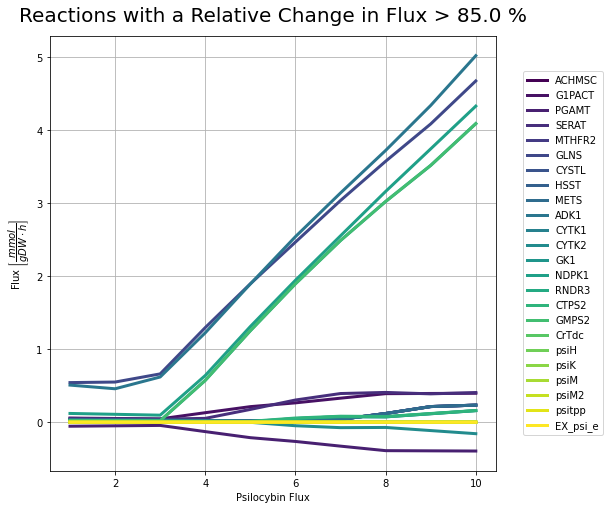

In [15]:
#Plotting depured data frame
fig2 = tr3.T.plot(cmap="viridis",figsize=(8, 8), grid =True, linewidth=3);
fig2.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
fig2.set_xlabel("Psilocybin Flux")
fig2.set_ylabel(r"Flux $\left[\dfrac{mmol}{gDW\cdot h}\right]$")
fig2.set_title('Reactions with a Relative Change in Flux > 85.0 %', size=20, y= 1.02)

In [35]:
Reactions = tr3.index.values.tolist()
for rx in Reactions:
    ID = model.reactions.get_by_id(rx)
    print(ID.id,"  ",ID.name, "  ",ID.reaction)

ACHMSC    ACHMSC    achms_c + cys_L_c --> ac_c + cyst_L_c + h_c
G1PACT    glucosamine-1-phosphate N-acetyltransferase    accoa_c + gam1p_c --> acgam1p_c + coa_c + h_c
PGAMT    phosphoglucosamine mutase    gam1p_c <-- gam6p_c
SERAT    serine O-acetyltransferase    accoa_c + ser_L_c --> acser_c + coa_c
MTHFR2     5,10_Methylenetetrahydrofolate reductase (NADH)    2.0 h_c + mlthf_c + nadh_c --> 5mthf_c + nad_c
GLNS    glutamine synthetase    atp_c + glu_L_c + nh4_c --> adp_c + gln_L_c + h_c + pi_c
CYSTL    cystathionine b_Lyase    cyst_L_c + h2o_c --> hcys_L_c + nh4_c + pyr_c
HSST    homoserine O-acetyltransferase    accoa_c + hom_L_c --> achms_c + coa_c
METS    methionine synthase    5mthf_c + hcys_L_c --> h_c + met_L_c + thf_c
ADK1    adenylate kinase    amp_c + atp_c <=> 2.0 adp_c
CYTK1    cytidylate kinase (CMP)    atp_c + cmp_c <=> adp_c + cdp_c
CYTK2    cytidylate kinase (dCMP)    atp_c + dcmp_c <=> adp_c + dcdp_c
GK1    guanylate kinase (GMP:ATP)    atp_c + gmp_c <=> adp_c + gdp_c


In [17]:
with model:    
    print("Normal Growth Conditions")
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin Production Rate")
    print(model.slim_optimize())

Normal Growth Conditions
Maximal Growth Rate:
0.428929662134894
Maximal Psilocybin Production Rate
5.69299883708285e-05


In [18]:
with model:
    model.reactions.GK1.knock_out()
    print("Without", model.reactions.GK1.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without guanylate kinase (GMP:ATP)
Maximal Growth Rate:
0.0
Maximal Psilocybin production rate
5.69299883708285e-05


In [19]:
with model:
    model.reactions.GMPS2.knock_out()
    print("Without", model.reactions.GMPS2.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without GMP synthase
Maximal Growth Rate:
0.0
Maximal Psilocybin production rate
5.69299883708285e-05


In [20]:
with model:
    model.reactions.RNDR3.knock_out()
    print("Without", model.reactions.RNDR3.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without ribonucleoside_Diphosphate reductase (CDP)
Maximal Growth Rate:
0.0
Maximal Psilocybin production rate
5.69299883708285e-05


In [21]:
with model:
    model.reactions.CYTK2.knock_out()
    print("Without", model.reactions.CYTK2.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without cytidylate kinase (dCMP)
Maximal Growth Rate:
0.428929662134894
Maximal Psilocybin production rate
5.69299883708285e-05


In [22]:
with model:
    model.reactions.NDPK1.knock_out()
    print("Without", model.reactions.NDPK1.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without nucleoside_Diphosphate kinase (ATP:GDP)
Maximal Growth Rate:
0.428929662134894
Maximal Psilocybin production rate
5.69299883708285e-05


In [23]:
with model:
    model.reactions.CYTK1.knock_out()
    print("Without", model.reactions.CYTK1.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without cytidylate kinase (CMP)
Maximal Growth Rate:
0.42812276640241825
Maximal Psilocybin production rate
5.69299883708285e-05


In [24]:
with model:
    model.reactions.ADK1.knock_out()
    print("Without", model.reactions.ADK1.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without adenylate kinase
Maximal Growth Rate:
0.428929662134894
Maximal Psilocybin production rate
5.69299883708285e-05


In [25]:
with model:
    model.reactions.GLNS.knock_out()
    print("Without", model.reactions.GLNS.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without glutamine synthetase
Maximal Growth Rate:
0.0
Maximal Psilocybin production rate
0.0


In [26]:
with model:
    model.reactions.CTPS2.knock_out()
    print("Without", model.reactions.CTPS2.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without CTP synthase (glutamine)
Maximal Growth Rate:
0.0
Maximal Psilocybin production rate
5.69299883708285e-05


In [27]:
with model:
    model.reactions.SERAT.knock_out()
    print("Without", model.reactions.SERAT.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without serine O-acetyltransferase
Maximal Growth Rate:
0.0
Maximal Psilocybin production rate
0.0


In [28]:
with model:
    model.reactions.METS.knock_out()
    print("Without", model.reactions.METS.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without methionine synthase
Maximal Growth Rate:
0.0
Maximal Psilocybin production rate
0.0


In [29]:
with model:
    model.reactions.HSST.knock_out()
    print("Without", model.reactions.HSST.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without homoserine O-acetyltransferase
Maximal Growth Rate:
0.428929662134894
Maximal Psilocybin production rate
5.69299883708285e-05


In [30]:
with model:
    model.reactions.CYSTL.knock_out()
    print("Without", model.reactions.CYSTL.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without cystathionine b_Lyase
Maximal Growth Rate:
0.0
Maximal Psilocybin production rate
0.0


In [31]:
with model:
    model.reactions.MTHFR2.knock_out()
    print("Without", model.reactions.MTHFR2.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without  5,10_Methylenetetrahydrofolate reductase (NADH)
Maximal Growth Rate:
0.0
Maximal Psilocybin production rate
0.0


In [32]:
with model:
    model.reactions.ACHMSC.knock_out()
    print("Without", model.reactions.ACHMSC.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without ACHMSC
Maximal Growth Rate:
0.428929662134894
Maximal Psilocybin production rate
5.69299883708285e-05


In [33]:
with model:
    model.reactions.G1PACT.knock_out()
    print("Without", model.reactions.G1PACT.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without glucosamine-1-phosphate N-acetyltransferase
Maximal Growth Rate:
0.0
Maximal Psilocybin production rate
5.69299883708285e-05


In [34]:
with model:
    model.reactions.PGAMT.knock_out()
    print("Without", model.reactions.PGAMT.name)
    print("Maximal Growth Rate:")
    print(model.slim_optimize())
    model.objective = model.reactions.EX_psi_e
    print("Maximal Psilocybin production rate")
    print(model.slim_optimize())

Without phosphoglucosamine mutase
Maximal Growth Rate:
0.0
Maximal Psilocybin production rate
5.69299883708285e-05
